# Data preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/driving_log.csv',names=['center','left','right','steering','throttle','reverse','speed'])

In [3]:
# counts: frequency
# angle: range of angle

In [4]:
counts ,angle = np.histogram(data['steering'],20,(-1,1))
counts ,angle

(array([   0,    0,    1,    4,   11,   31,   85,  207,  234,  175, 3795,
         193,  150,   71,   23,   15,    3,    0,    0,    0], dtype=int64),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [5]:
center = (angle[:-1]+angle[1:])/2
center

array([-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15,
       -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
        0.85,  0.95])

<BarContainer object of 20 artists>

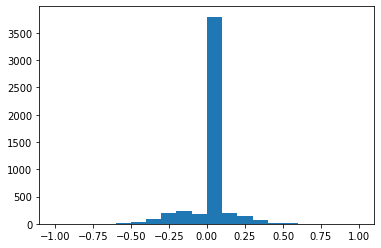

In [6]:
import matplotlib.pyplot as plt
plt.bar(center,counts,width=0.1)

<BarContainer object of 20 artists>

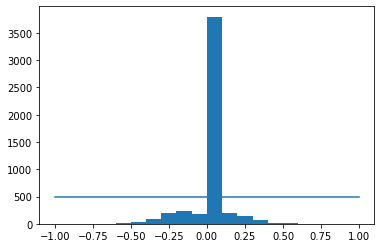

In [7]:
plt.plot((-1,1),(500,500))
plt.bar(center,counts,width=0.1)

In [8]:
## According to the distribution law of the data, delete some training data with a lot of results.
## Record the position information of all straight (the angle of the steering wheel is 0) data

list = []
for i in range (0,len(data['steering'])):
    if data['steering'][i]==0:
        list.append(i)
print(len(list))

3599


In [9]:
np.random.shuffle(list)
remove_list = list[500:]
print(len(remove_list))

3099


In [10]:
data.drop(remove_list,inplace=True)

<BarContainer object of 20 artists>

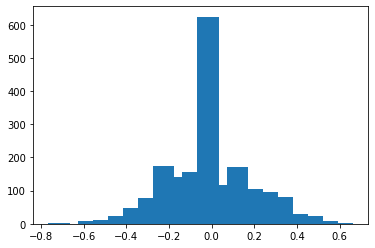

In [11]:
counts ,angle = np.histogram(data['steering'],20)
center = (angle[:-1]+angle[1:])/2
plt.bar(center,counts,width=0.1)

In [12]:
info = data[['center','steering']]
info.to_csv('info.csv')

# Split data into train and val

In [13]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(info['center'],info['steering'],test_size=0.15,random_state=20)

In [14]:
print("train data length{},val data length{}".format(len(X_train),len(X_test)))

train data length1614,val data length285


(array([ 1.,  0.,  2.,  2.,  3.,  6., 10., 20., 24., 22., 22., 92., 15.,
        26., 11.,  8., 10.,  6.,  2.,  3.]),
 array([-0.6843076 , -0.62307992, -0.56185224, -0.50062456, -0.43939688,
        -0.3781692 , -0.31694152, -0.25571384, -0.19448616, -0.13325848,
        -0.0720308 , -0.01080312,  0.05042456,  0.11165224,  0.17287992,
         0.2341076 ,  0.29533528,  0.35656296,  0.41779064,  0.47901832,
         0.540246  ]),
 <BarContainer object of 20 artists>)

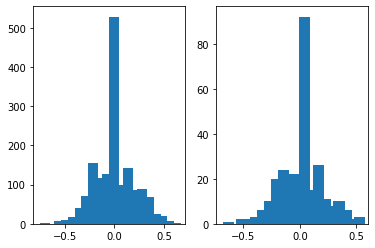

In [58]:
plt.subplot(121)
plt.hist(y_train,20,width=0.1)
plt.subplot(122)
plt.hist(y_test,20,width=0.1)

In [59]:
import cv2

# rgb->yuv format and adjust width and height

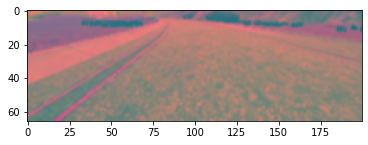

In [69]:
index  = np.random.randint(0,len(X_train))
img = plt.imread(X_train.iloc[index])
img = img[55:150,:]
img = cv2.GaussianBlur(img,(3,3),1)
img = cv2.resize(img,(200,66))
img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
plt.imshow(img)

# Prepare data for CNN

In [70]:
def img_pre(img_path):
    img = plt.imread(X_train.iloc[index])
    img = img[55:150,:]
    img = cv2.GaussianBlur(img,(3,3),1)
    img = cv2.resize(img,(200,66))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    return img

In [72]:
trainImage = []
for i in range (0,len(X_train)):
    img = img_pre(X_train.iloc[i])
    img = img/255.0
    trainImage.append(img)
X_train_images = np.array(trainImage)

In [73]:
testImage = []
for i in range (0,len(X_test)):
    img = img_pre(X_test.iloc[i])
    img = img/255.0
    testImage.append(img)
X_test_images = np.array(testImage)

In [74]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [77]:
np.savez('X_train.npz',X_train_images)
np.savez('X_test.npz',X_test_images)
np.savez('y_train.npz',y_train)
np.savez('y_test.npz',y_test)